In [139]:
#Import necessary libraries
%matplotlib inline
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [140]:
# Helper function to define plot characteristics
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$", fontsize=18)
    axes[0].set_xlabel("$x$", fontsize=18)
    axes[1].set_xlabel("$x$", fontsize=18)
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes
    

In [141]:
# Reading the file into a dataframe
df = pd.read_csv("noisypopulation.csv")


In [142]:
df.head()

,f,x,y
0,0.047790,0.00,0.011307
1,0.051199,0.01,0.010000
2,0.054799,0.02,0.007237
3,0.058596,0.03,0.000056
4,0.062597,0.04,0.010000


In [143]:
# Set column x is the predictor and column y is the response variable.
# Column f is the true function of the given data
# Select the values of the columns (should be numpy arrays)

x = df.x.values
f = df.f.values
y = df.y.values


In [144]:
### edTest(test_poly) ###
# Function to compute the Polynomial Features for the data x 
# for the given degree d
def polyshape(d, x):
    return PolynomialFeatures(d).fit_transform(x.reshape(-1,1))
    

In [145]:
### edTest(test_linear) ###
# Function to fit a Linear Regression model 
def make_predict_with_model(x, y, x_pred):
    
    # Create a Linear Regression model with fit_intercept as False
    lreg = LinearRegression(fit_intercept=False)
    
    # Fit the model to the data x and y got parameters to the function
    lreg.fit(x, y)
    
    # Predict on the x_pred data got as a parameter to this function
    y_pred = lreg.predict(x_pred)

    # Return the linear model and the prediction on the test data
    return lreg, y_pred


In [146]:
# Function to perform sampling and fit the data, with the following parameters

# degree is the maximum degree of the model
# num_sample is the number of samples
# size is the number of random points selected from the data for each sample
# x is the predictor variable
# y is the response variable

def gen(degree, num_sample, size, x, y):
    
    # Create 2 lists to store the prediction and model
    predicted_values, linear_models =[], []
    
    # Loop over the number of samples
    for i in range(num_sample):
        
        # Helper code to call the make_predict_with_model function to fit on the data
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        
        # lreg and y_pred hold the model and predicted values for the current sample
        lreg, y_pred = make_predict_with_model(polyshape(degree, x[indexes]), y[indexes], polyshape(degree, x))
        
        # Append the model and predicted values to the appropriate lists
        predicted_values.append(y_pred)
        linear_models.append(lreg)
    
    # Return the 2 lists, one for predicted values and one for the model
    return predicted_values, linear_models
    

In [147]:
### edTest(test_gen) ###
# Call the function gen() twice with x and y as the 
# predictor and response variable respectively

# Set the number of samples to 200 and the number of points as 30
# Store the return values in appropriate variables

# Get results for degree 1
predicted_1, model_1 = gen(degree=2, num_sample=200, size=30, x=x, y=y);

# Get results for degree 100
predicted_100, model_100 = gen(degree=100, num_sample=200, size=30, x=x, y=y);


<Figure size 1200x800 with 0 Axes>

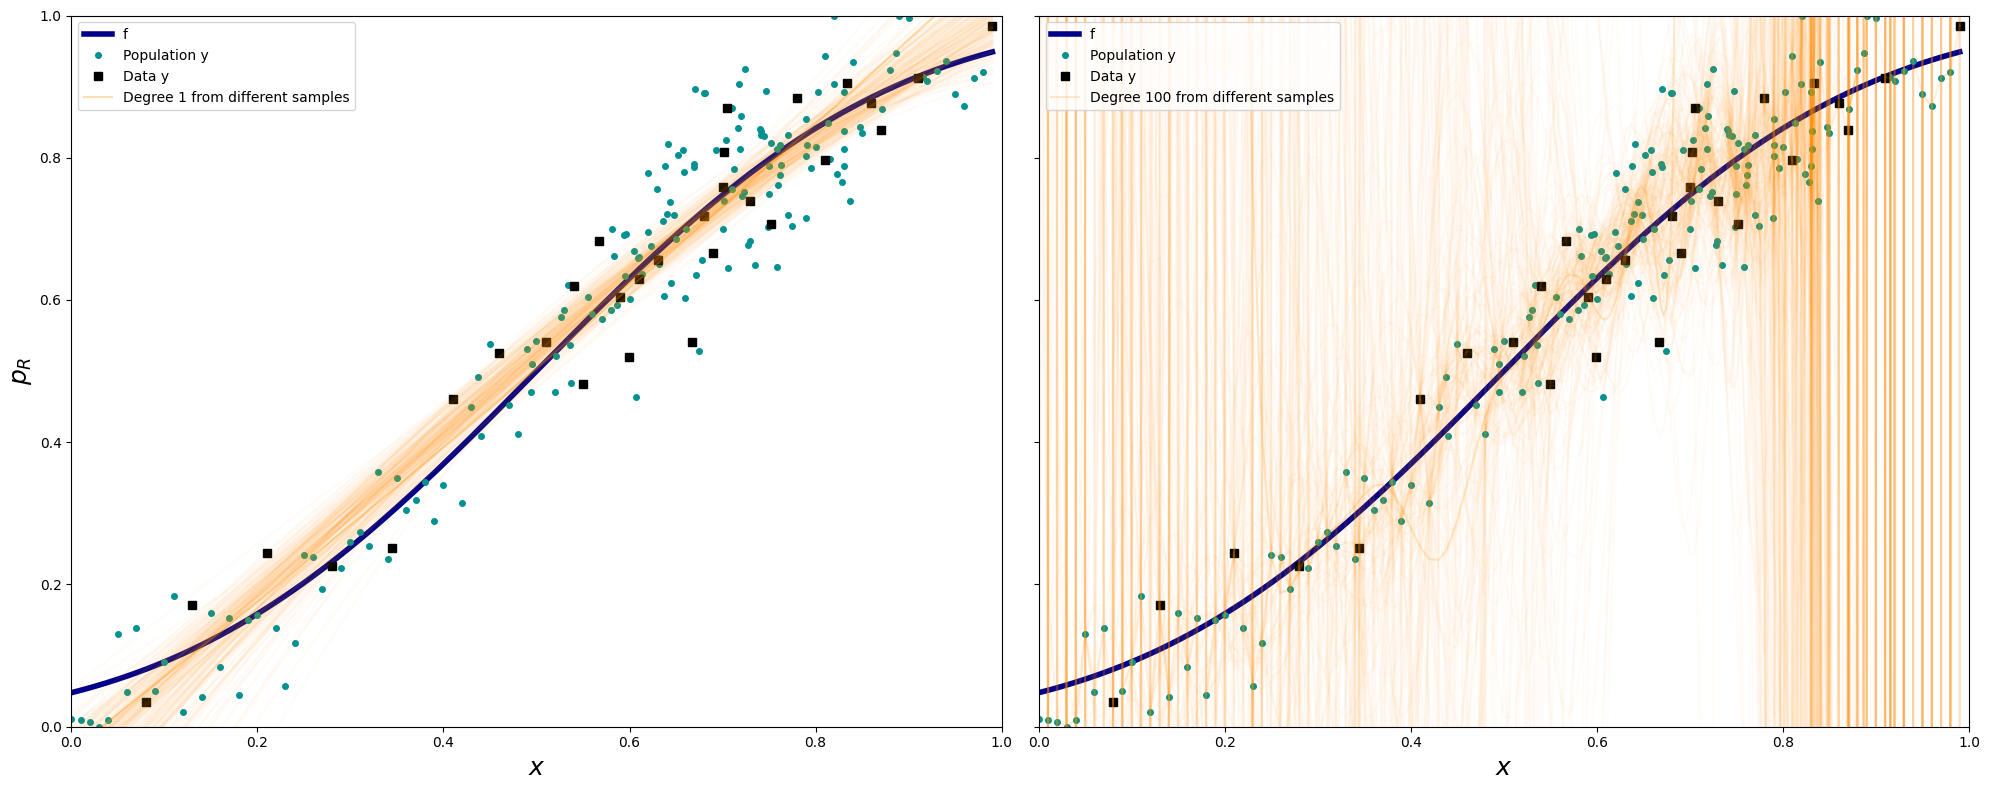

In [148]:
# Helper code to plot the data
indexes = np.sort(np.random.choice(x.shape[0], size=30, replace=False))

plt.figure(figsize = (12,8))
axes=make_plot()

# Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples")


# Plot for Degree 100
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x[indexes], y[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x,predicted_100[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples")

axes[0].legend(loc='best')
axes[1].legend(loc='best')

plt.show();


#### ⏸ After you mark the exercise, run the code again, but this time with degree 10 instead of 100. Do you see a decrease in variance? Why are the edges still so erractic? Also check the values of the coefficients for each of your runs. Do you see a pattern? 


In [149]:
model_1

[LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),


In [150]:
model_100[0]

LinearRegression(fit_intercept=False)

In [151]:
model_1_arr = np.stack(model_1, axis=0)
model_1_arr.shape

(200,)

In [152]:
fill = np.zeros(shape = model_1[0].coef_.shape)
fill

array([0., 0., 0.])

In [153]:
arr = np.full(shape=(len(model_1),model_1[0].coef_.shape[0]), 
                  fill_value=fill)

arr.shape

(200, 3)

In [154]:
from numba import jit

# @jit()
def list_of_lregs_to_array(lregs):

    fill = np.zeros(shape = lregs[0].coef_.shape)

    arr = np.full(shape=(len(lregs),lregs[0].coef_.shape[0]), 
                  fill_value=fill)

    # print(arr)

    for i in range(len(lregs)):
        print(lregs[i].coef_)
        arr[i] = lregs[i].coef_

    return arr

In [155]:
model_100_arr = list_of_lregs_to_array(model_1)

m100df = pd.DataFrame(model_100_arr)
m100df.head()

[-0.12341524  1.61210543 -0.54525809]
[-0.30102141  2.17353524 -0.95132643]
[-0.55778435  2.80865244 -1.32729604]
[-0.05292925  1.23939861 -0.201344  ]
[-0.13291434  1.52823704 -0.4180043 ]
[-0.12314693  1.54167743 -0.40717186]
[-0.03825049  1.16622133 -0.13597835]
[-0.36633786  2.25686351 -0.96309913]
[-0.12292252  1.44313138 -0.29415903]
[0.02118752 0.93253877 0.08253224]
[-0.06433552  1.30058137 -0.25491396]
[-0.02719687  1.19073315 -0.11790312]
[-0.01131148  1.15664026 -0.11661972]
[-0.05580212  1.20660638 -0.09185287]
[-0.04636723  1.27454451 -0.21815893]
[-0.08006989  1.4437959  -0.33879376]
[-0.03163172  1.00494116  0.14150407]
[-0.03194415  1.23654547 -0.24261708]
[-0.07708583  1.32983364 -0.21702964]
[-0.14276085  1.47276905 -0.29076028]
[-0.39779612  2.40060633 -1.04160152]
[-0.02153169  1.1141638  -0.07551265]
[-0.23705633  1.95520596 -0.80835233]
[-0.11581516  1.40915089 -0.28390098]
[-0.03359013  1.30482142 -0.287044  ]
[-0.06200813  1.10911477 -0.02200947]
[0.01429466 0.9

,0,1,2
0,-0.123415,1.612105,-0.545258
1,-0.301021,2.173535,-0.951326
2,-0.557784,2.808652,-1.327296
3,-0.052929,1.239399,-0.201344
4,-0.132914,1.528237,-0.418004


{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x284c1774cd0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x284c1775090>,
 'cmins': <matplotlib.collections.LineCollection at 0x284c17751d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x284c1775310>}

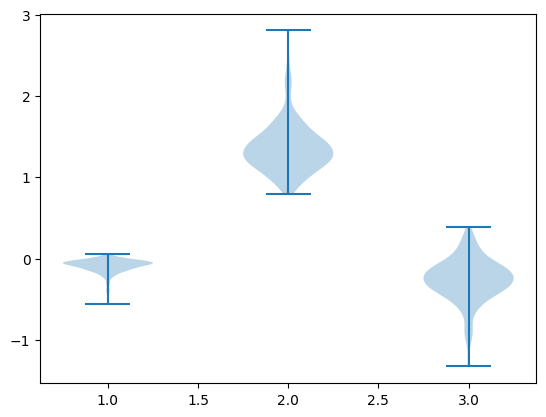

In [156]:
fig, ax = plt.subplots()

ax.violinplot(model_100_arr)